Weather forecasting at Ria Arousa

This dataset is focused on meteorological stations at Ria Arousa (Spain). The meteorological stations is: Cortegada at latitude: 42.626 N and longitude: 8.784 W. diro: wind direction (degrees) 
gustdirectiono: gust direction (degees) gustspeedo: gust speed (m/s) spdo: speed (m/s) stddiro: standard deviation direction (degrees) stdspdo: standard deviation speed (m/s)
gustspdmaxhourbeforeo: max gust speed an hour before (m/s) temp: Air Temperature in Kelvin at 2 meters.
        
This data does not show outcomes or predicts storms or clam weather. The idea is to cluster the data and figure out what type of weather those clusters tend to predict.

In [1]:
!pip install ibm-cos-sdk

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
#os.chdir('data')
#from colorsetup import colors, palette
#sns.set_palette(palette)
%matplotlib inline
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3


In [3]:
import seaborn as sns
coloribm = {"Magenta 100":"2A0A16", "Magenta 90":"57002B", "Magenta 80":"760A3A", "Magenta 70":"A11950", "Magenta 60":"D12765", "Magenta 50":"EE538B", "Magenta 40":"FA75A6", "Magenta 30":"FFA0C2", "Magenta 20":"FFCFE1", "Magenta 10":"FFF0F6", "Purple 100":"1E1033", "Purple 90":"38146B", "Purple 80":"4F2196", "Purple 70":"6E32C9", "Purple 60":"8A3FFC", "Purple 50":"A66EFA", "Purple 40":"BB8EFF", "Purple 30":"D0B0FF", "Purple 20":"E6D6FF", "Purple 10":"F7F1FF", "Blue 100":"051243", "Blue 90":"061F80", "Blue 80":"0530AD", "Blue 70":"054ADA", "Blue 60":"0062FF", "Blue 50":"408BFC", "Blue 40":"6EA6FF", "Blue 30":"97C1FF", "Blue 20":"C9DEFF", "Blue 10":"EDF4FF", "Teal 100":"081A1C", "Teal 90":"003137", "Teal 80":"004548", "Teal 70":"006161", "Teal 60":"007D79", "Teal 50":"009C98", "Teal 40":"00BAB6", "Teal 30":"20D5D2", "Teal 20":"92EEEE", "Teal 10":"DBFBFB", "Gray 100":"171717", "Gray 90":"282828", "Gray 80":"3D3D3D", "Gray 70":"565656", "Gray 60":"6F6F6F", "Gray 50":"8C8C8C", "Gray 40":"A4A4A4", "Gray 30":"BEBEBE", "Gray 20":"DCDCDC", "Gray 10":"F3F3F3"} 
colors = []
colornum = 60
for i in [f'Blue {colornum}', f'Teal {colornum}', f'Magenta {colornum}', f'Purple {colornum}', f'Gray {colornum}']:
    colors.append(f'#{coloribm[i]}')
palette = sns.color_palette(colors)


In [4]:
pip install colour

Note: you may need to restart the kernel to use updated packages.


In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [6]:
# The code was removed by Watson Studio for sharing.

In [7]:
data.shape

(90432, 24)

In [8]:
data.head()

time        dir0       mod0  wind_gust0        mslp0       temp0  \
0  1/3/2010 0:00  166.244751  10.572862   12.931561  100673.8125  286.756073   
1  1/3/2010 1:00  160.286255  13.737501   15.760801  100422.6406  287.255737   
2  1/3/2010 2:00  174.143463  15.747597   23.766697  100389.8672  287.624176   
3  1/3/2010 3:00  173.907684  17.533861   25.642481  100312.4219  287.766388   
4  1/3/2010 4:00  173.191208  17.138390   25.355106  100236.6563  287.971619   

        rh0   visibility0      lhflx0      lwflx0  ...  cape0      cin0  cfh0  \
0  0.880696   3036.573486   82.336792  375.442444  ...    0.0 -0.001328   1.0   
1  0.822041  20635.626950  128.879730  374.161407  ...    0.0 -0.004648   1.0   
2  0.817438  24036.587890  139.651764  376.332855  ...    0.0  0.003398   1.0   
3  0.830344  22438.730470  139.857941  378.278534  ...    0.0 -0.000781   1.0   
4  0.838364  24040.597660  118.182022  379.001617  ...    0.0  0.001172   1.0   

       cfl0  cfm0      cft0      HGT5000      HGT8500       T5000       T8500  
0  1.000000  1.00  1.000000  5507.500977  1389.400024  256.433014  279.057129  
1  1.000000  1.00  1.000000  5503.676758  1370.271973  256.406555  279.806244  
2  1.003685  1.00  1.003685  5501.307129  1367.939941  255.797379  280.929810  
3  1.003349  0.86  1.003349  5489.334961  1363.004028  255.762878  281.029053  
4  1.000979  0.87  1.000979  5478.645020  1356.869995  254.424561  281.015564  

[5 rows x 24 columns]

In [9]:
data_del = data.drop(['HGT5000', 'HGT8500', 'T5000', 'T8500', 'time', 'swflx0', 'shflx0', 'cfl0', 'cfm0'], axis=1)

In [10]:
data_del.head()

dir0       mod0  wind_gust0        mslp0       temp0       rh0  \
0  166.244751  10.572862   12.931561  100673.8125  286.756073  0.880696   
1  160.286255  13.737501   15.760801  100422.6406  287.255737  0.822041   
2  174.143463  15.747597   23.766697  100389.8672  287.624176  0.817438   
3  173.907684  17.533861   25.642481  100312.4219  287.766388  0.830344   
4  173.191208  17.138390   25.355106  100236.6563  287.971619  0.838364   

    visibility0      lhflx0      lwflx0  conv_prec0     prec0  cape0  \
0   3036.573486   82.336792  375.442444        0.00  3.070002    0.0   
1  20635.626950  128.879730  374.161407        0.02  4.770000    0.0   
2  24036.587890  139.651764  376.332855        0.34  0.879997    0.0   
3  22438.730470  139.857941  378.278534        0.11  0.780003    0.0   
4  24040.597660  118.182022  379.001617        0.08  0.459999    0.0   

       cin0  cfh0      cft0  
0 -0.001328   1.0  1.000000  
1 -0.004648   1.0  1.000000  
2  0.003398   1.0  1.003685  
3 -0.000781   1.0  1.003349  
4  0.001172   1.0  1.000979

Pre_Processing Data Check for data types, Null Values, check for standard distribution

dir: Predicted wind direction at 10 meters. From North direction clockwise. Units are degrees. Unlike dir_o no variable wind is forecasted (no -1 values)

mod: Wind intensity forecasted at 10 meters. Units are meters per second.

wind_gust: Wind gust at 10 meters. Units are meters per second. 

mslp: Sea Level Pressure in pascals

temp: Air Temperature in Kelvin at 2 meters

rh: Relative Humidity. Units fraction

visibility: Visibility in the air. Units meters. Minimum visibility 26.028316 meters. Maximum visibility 24235.000000

lhflx: Surface downward latent heat flux. Units, watts per square meters.

lwflx: Surface downward latent heat flux. Units: W m-2

conv_prec: Total accumulated convective rainfall between each model output. Every hour in our case.

prec: Total accumulated rainfall between each model output. In our case, every hour. Units kilograms per meter squared.

cape: Convective available potential energy. Units: Jules per kilogram. 

cfl: Cloud area fraction at low atmosphere layer. I found 1251 samples with values higher than 1 !! Perhaps, we wouldn’t trust this feature so much.

cfm: Cloud area fraction at mid atmosphere layer. Also, I found 37 samples with values higher than 1.

cfh: Cloud cover at high levels. Units fraction

cft: Cloud cover at low and mid-levels. Units fraction


In [11]:
data_del.dtypes

dir0           float64
mod0           float64
wind_gust0     float64
mslp0          float64
temp0          float64
rh0            float64
visibility0    float64
lhflx0         float64
lwflx0         float64
conv_prec0     float64
prec0          float64
cape0          float64
cin0           float64
cfh0           float64
cft0           float64
dtype: object

Ensuring that data all are float types or else, one hot encoding is required.

In [12]:
data_del.isnull().values.any()

False

Heat Map to demonstrating correleations between columns of data.

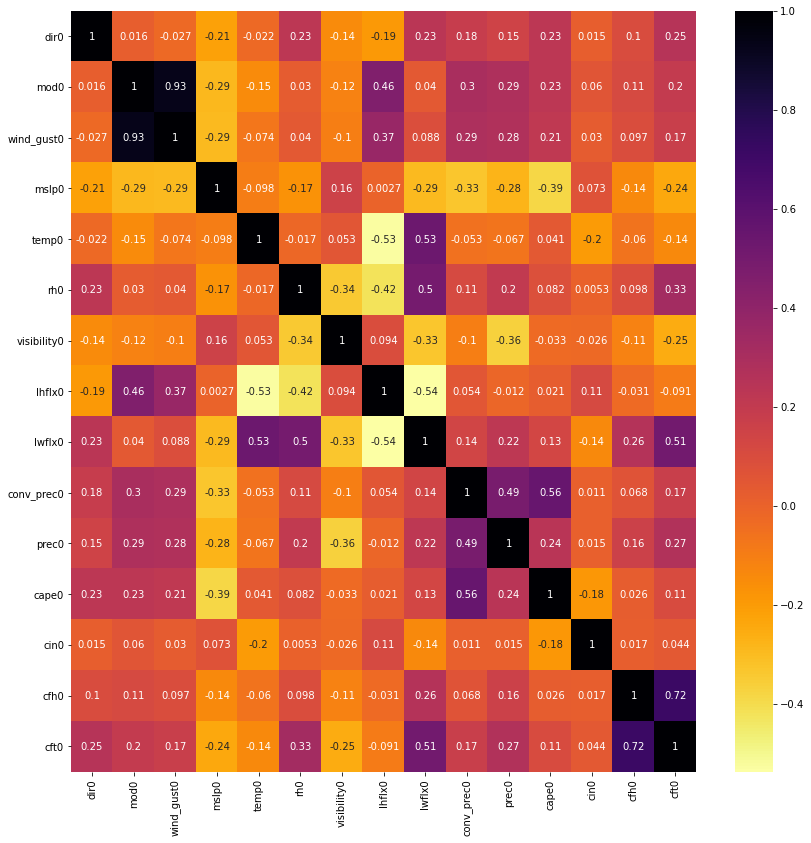

In [13]:
plt.figure(figsize=(14,14))
p=sns.heatmap(data_del.corr(), annot=True,cmap ='inferno_r') # seaborn has very simple solution for heatmap

High correlations exist between:

wind_gust0 & mod0

lwflx & temp0

conv_prec & cape

cfh & cft


In [14]:
# The correlation matrix
### BEGIN SOLUTION
float_columns = [x for x in data_del.columns]
corr_mat = data_del[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
# Pairwise maximal correlations
corr_mat.abs().idxmax()

dir0                 cft0
mod0           wind_gust0
wind_gust0           mod0
mslp0               cape0
temp0              lwflx0
rh0                lwflx0
visibility0         prec0
lhflx0             lwflx0
lwflx0             lhflx0
conv_prec0          cape0
prec0          conv_prec0
cape0          conv_prec0
cin0                temp0
cfh0                 cft0
cft0                 cfh0
dtype: object

array([[<AxesSubplot:title={'center':'dir0'}>,
        <AxesSubplot:title={'center':'mod0'}>,
        <AxesSubplot:title={'center':'wind_gust0'}>,
        <AxesSubplot:title={'center':'mslp0'}>],
       [<AxesSubplot:title={'center':'temp0'}>,
        <AxesSubplot:title={'center':'rh0'}>,
        <AxesSubplot:title={'center':'visibility0'}>,
        <AxesSubplot:title={'center':'lhflx0'}>],
       [<AxesSubplot:title={'center':'lwflx0'}>,
        <AxesSubplot:title={'center':'conv_prec0'}>,
        <AxesSubplot:title={'center':'prec0'}>,
        <AxesSubplot:title={'center':'cape0'}>],
       [<AxesSubplot:title={'center':'cin0'}>,
        <AxesSubplot:title={'center':'cfh0'}>,
        <AxesSubplot:title={'center':'cft0'}>, <AxesSubplot:>]],
      dtype=object)

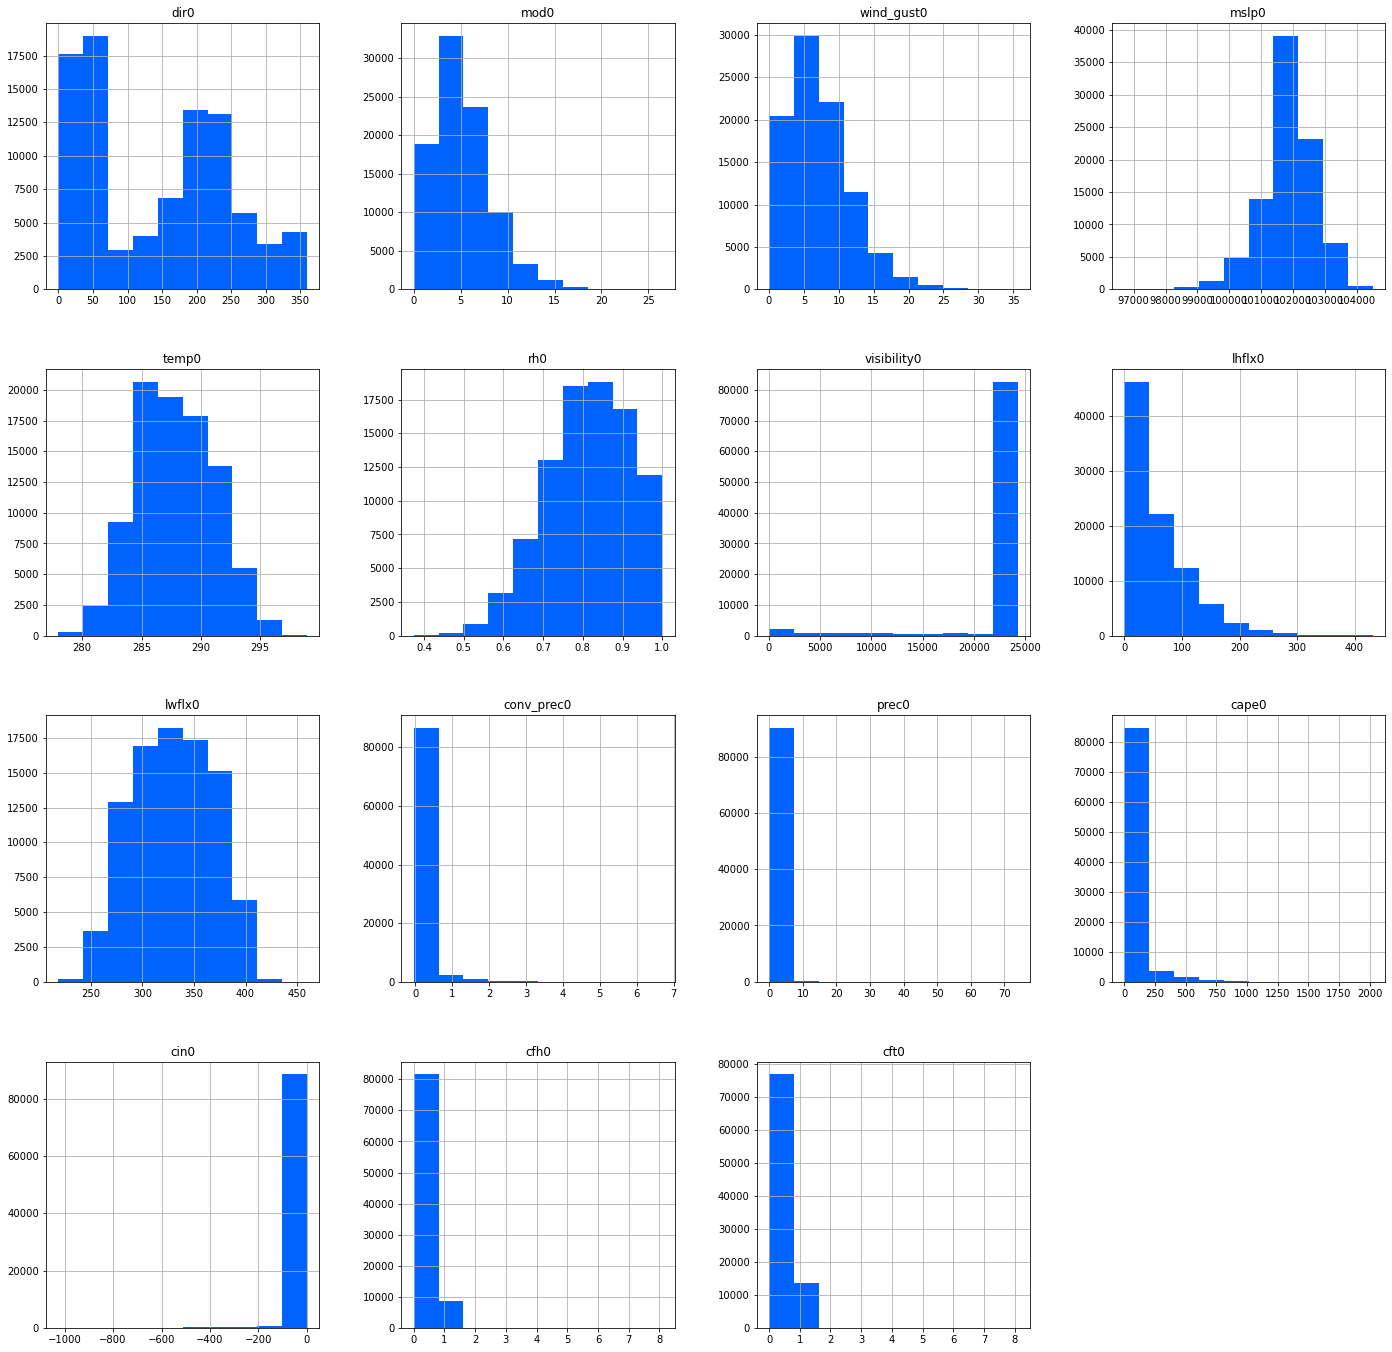

In [15]:
data_del.hist(color=colors[0], figsize=(24, 24))

Some of the data above are not normally distributed.

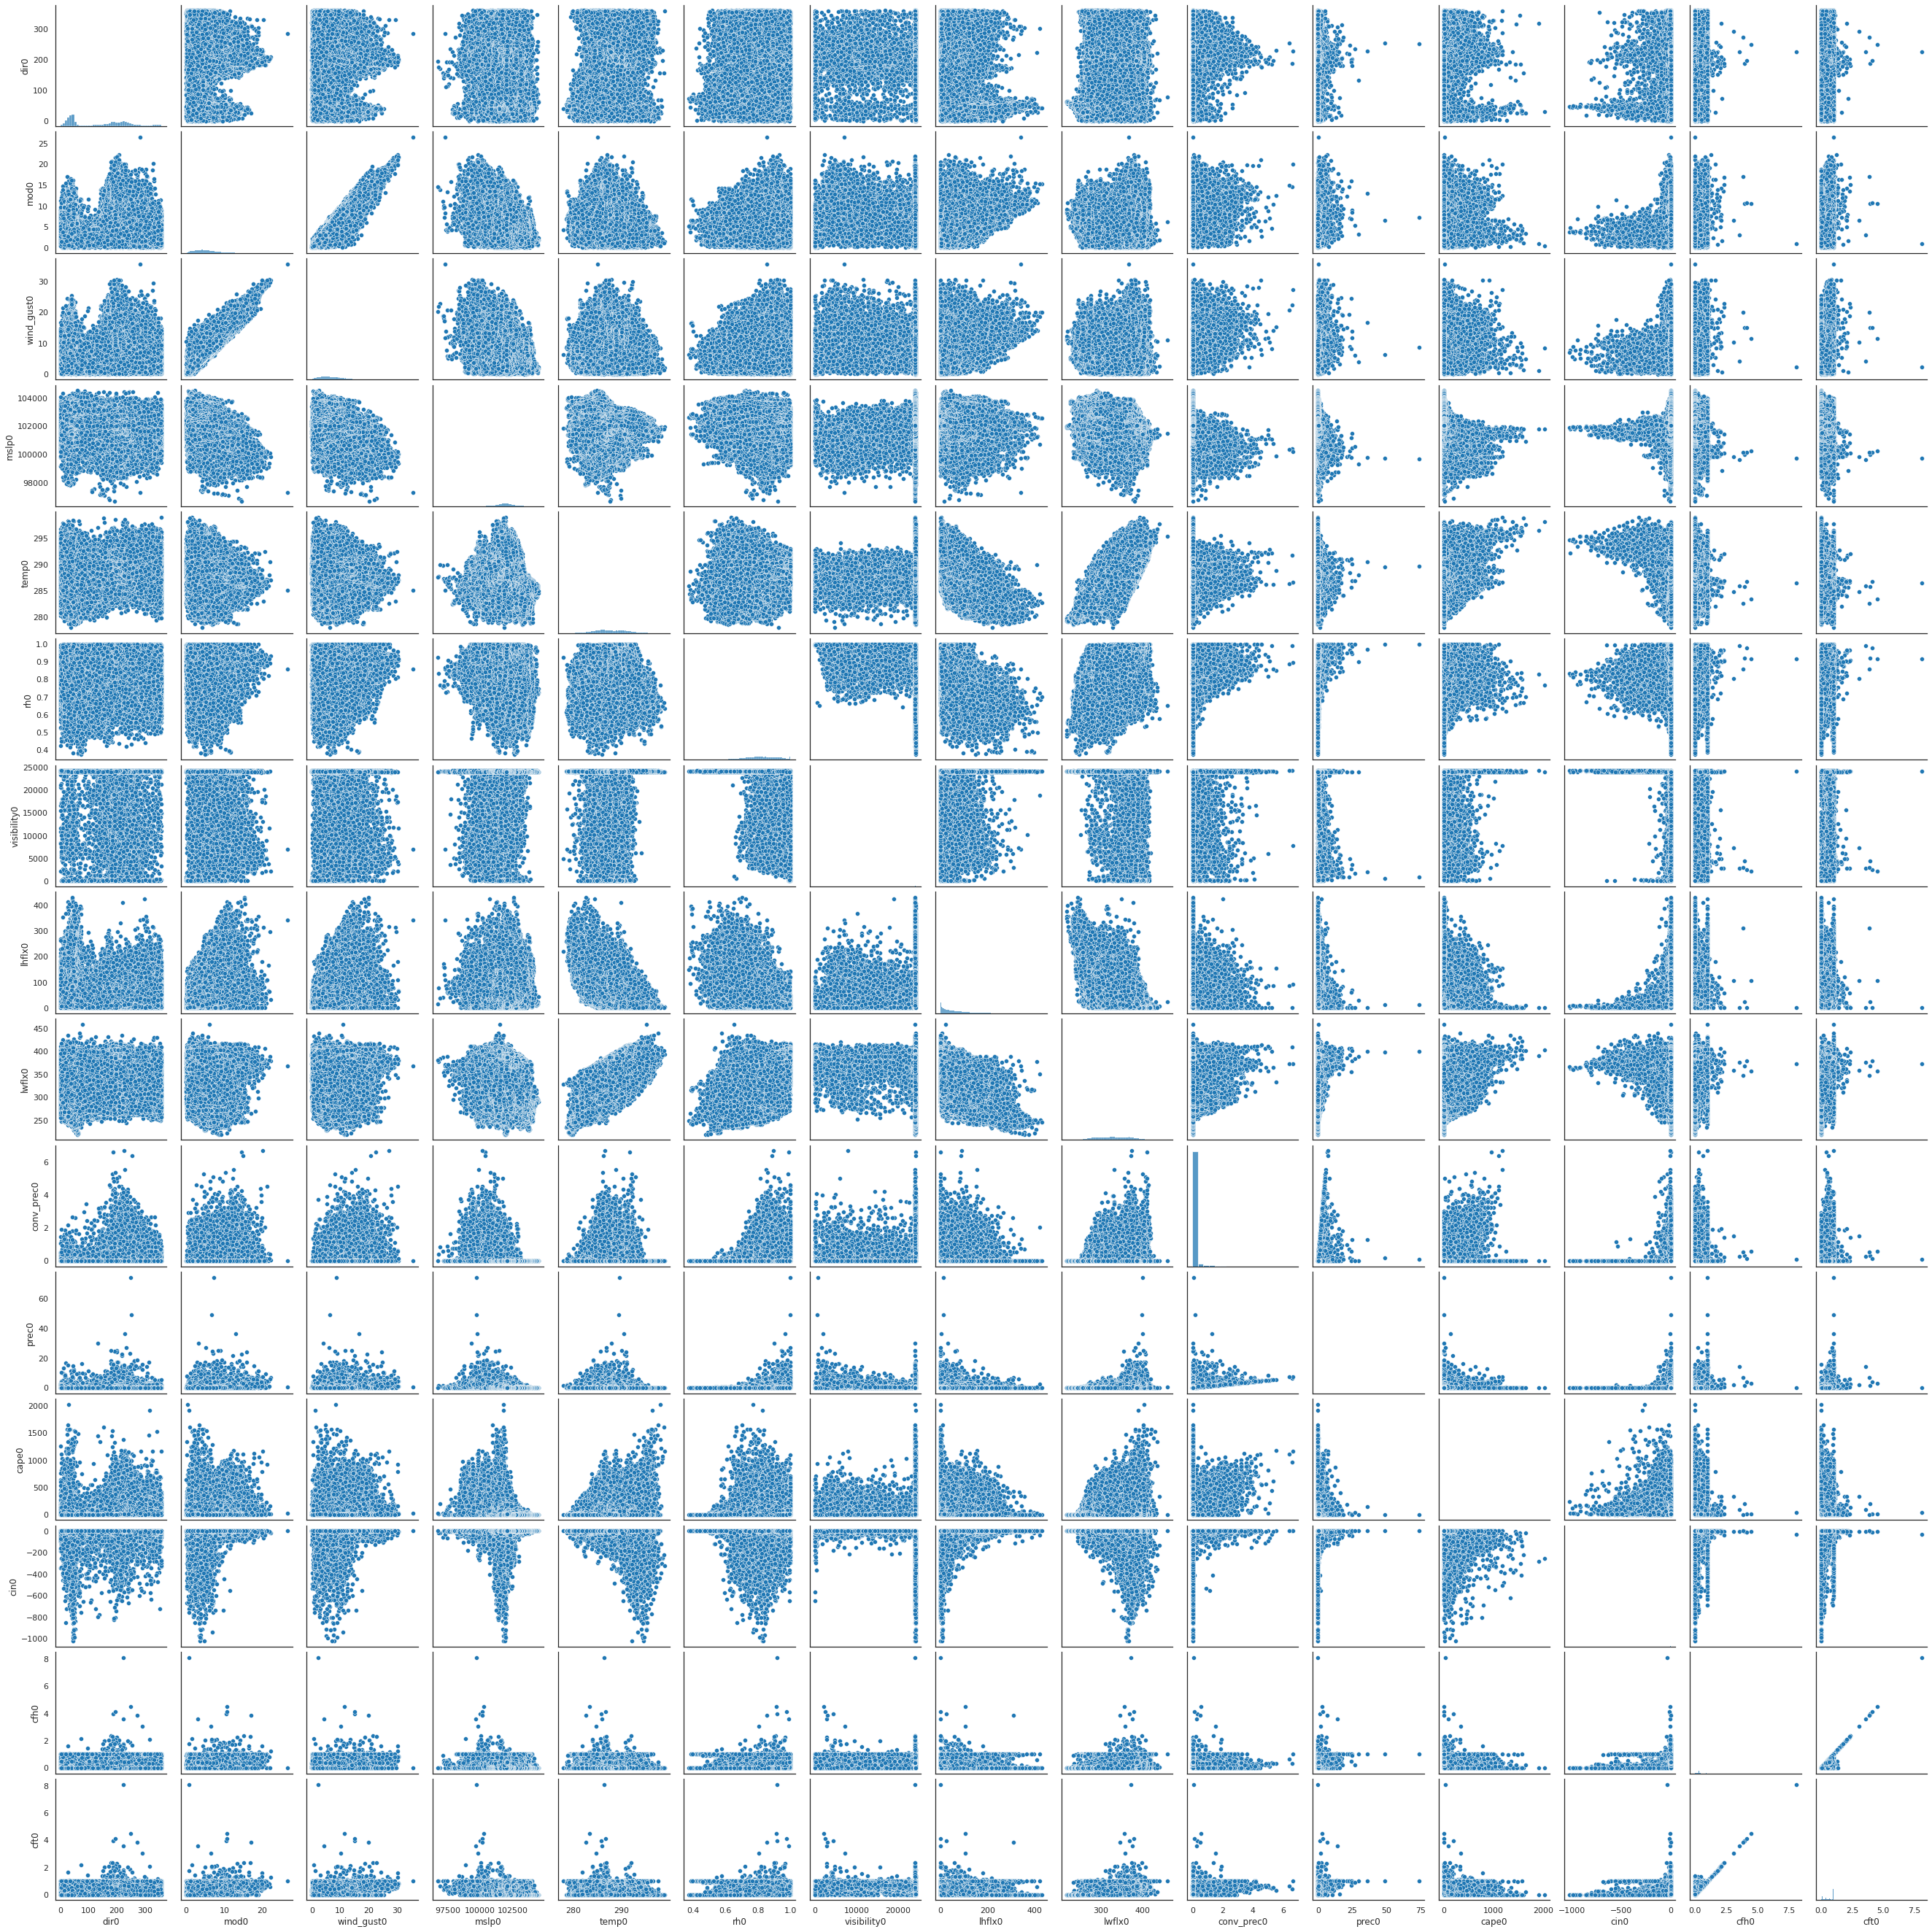

In [16]:
sns.set_context('notebook')
sns.set_style('white')
sns.pairplot(data_del);

A value is normalized as follows:
y = (x – min) / (max – min)

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.
A value is standardized as follows:

y = (x – mean) / standard_deviation

In [16]:
skew_columns = data_del.skew().sort_values(ascending=False)

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

prec0         18.241951
conv_prec0     6.332812
cape0          4.698357
cfh0           2.308762
lhflx0         1.519432
cft0           1.119474
mod0           0.934429
wind_gust0     0.931469
dtype: float64

In [17]:
skew_columns2 = data_del.skew().sort_values(ascending=False)

skew_columns2 = skew_columns2.loc[skew_columns2 < 0.0]
skew_columns2

lwflx0        -0.027799
rh0           -0.364057
mslp0         -0.570461
visibility0   -3.696142
cin0          -9.835984
dtype: float64

In [18]:
data_del.head()

dir0       mod0  wind_gust0        mslp0       temp0       rh0  \
0  166.244751  10.572862   12.931561  100673.8125  286.756073  0.880696   
1  160.286255  13.737501   15.760801  100422.6406  287.255737  0.822041   
2  174.143463  15.747597   23.766697  100389.8672  287.624176  0.817438   
3  173.907684  17.533861   25.642481  100312.4219  287.766388  0.830344   
4  173.191208  17.138390   25.355106  100236.6563  287.971619  0.838364   

    visibility0      lhflx0      lwflx0  conv_prec0     prec0  cape0  \
0   3036.573486   82.336792  375.442444        0.00  3.070002    0.0   
1  20635.626950  128.879730  374.161407        0.02  4.770000    0.0   
2  24036.587890  139.651764  376.332855        0.34  0.879997    0.0   
3  22438.730470  139.857941  378.278534        0.11  0.780003    0.0   
4  24040.597660  118.182022  379.001617        0.08  0.459999    0.0   

       cin0  cfh0      cft0  
0 -0.001328   1.0  1.000000  
1 -0.004648   1.0  1.000000  
2  0.003398   1.0  1.003685  
3 -0.000781   1.0  1.003349  
4  0.001172   1.0  1.000979

In [19]:
data_del.index

RangeIndex(start=0, stop=90432, step=1)

LOG TRANSFORMATION BEFORE SO WE GET STANDARDIZED DISTRIBUTION

In [20]:
# The log transformations

data_del_log = np.log1p(data_del)

In [21]:
data_del_log.head() #still a pandas dataframe

dir0      mod0  wind_gust0      mslp0     temp0       rh0  visibility0  \
0  5.119458  2.448663    2.634157  11.519651  5.662113  0.631642     8.018814   
1  5.083181  2.690395    2.819043  11.517153  5.663848  0.599957     9.934823   
2  5.165605  2.818255    3.209500  11.516827  5.665125  0.597428    10.087374   
3  5.164258  2.919599    3.282507  11.516055  5.665618  0.604504    10.018588   
4  5.160154  2.898031    3.271662  11.515299  5.666328  0.608876    10.087541   

     lhflx0    lwflx0  conv_prec0     prec0  cape0      cin0      cfh0  \
0  4.422890  5.930765    0.000000  1.403643    0.0 -0.001329  0.693147   
1  4.866609  5.927356    0.019803  1.752672    0.0 -0.004659  0.693147   
2  4.946287  5.933128    0.292670  0.631270    0.0  0.003393  0.693147   
3  4.947752  5.938271    0.104360  0.576615    0.0 -0.000782  0.693147   
4  4.780652  5.940176    0.076961  0.378436    0.0  0.001171  0.693147   

       cft0  
0  0.693147  
1  0.693147  
2  0.694988  
3  0.694820  
4  0.693637

In [22]:
data_del_log_MMS = data_del_log

In [23]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()
for col in data_del_log_MMS.columns:
    data_del_log_MMS[col] = MMS.fit_transform(data_del_log_MMS[[col]]).squeeze()

In [24]:
data_del_log_MMS

dir0      mod0  wind_gust0     mslp0     temp0       rh0  \
0      0.869207  0.738046    0.730572  0.518395  0.426986  0.836097   
1      0.863040  0.811286    0.782106  0.486192  0.450954  0.751661   
2      0.877052  0.850025    0.890938  0.481984  0.468600  0.744921   
3      0.876823  0.880730    0.911287  0.472035  0.475406  0.763778   
4      0.876125  0.874195    0.908264  0.462294  0.485221  0.775430   
...         ...       ...         ...       ...       ...       ...   
90427  0.899460  0.493926    0.548361  0.688854  0.519841  0.939961   
90428  0.886810  0.405201    0.483917  0.688856  0.497887  0.970865   
90429  0.882076  0.417456    0.481844  0.690491  0.486007  0.990776   
90430  0.921303  0.417180    0.397207  0.693230  0.477600  0.993861   
90431  0.933551  0.423195    0.370470  0.694923  0.465633  0.993670   

       visibility0    lhflx0    lwflx0  conv_prec0     prec0     cape0  \
0         0.693883  0.731723  0.727538    0.019619  0.334744  0.000000   
1         0.976302  0.803992  0.722929    0.029137  0.414467  0.000000   
2         0.998788  0.816969  0.730732    0.160276  0.158324  0.000000   
3         0.988649  0.817208  0.737685    0.069774  0.145840  0.000000   
4         0.998813  0.789992  0.740261    0.056607  0.100573  0.000000   
...            ...       ...       ...         ...       ...       ...   
90427     0.998838  0.393143  0.675653    0.019619  0.014133  0.124074   
90428     0.998816  0.369281  0.568097    0.019619  0.035904  0.101934   
90429     0.998786  0.389247  0.770608    0.019619  0.014133  0.234494   
90430     0.316120  0.415034  0.770046    0.019619  0.035903  0.252691   
90431     0.317603  0.457901  0.766760    0.019619  0.035903  0.220416   

           cin0      cfh0      cft0  
0      0.994766  0.313969  0.313969  
1      0.994416  0.313969  0.313969  
2      0.995263  0.313969  0.314803  
3      0.994824  0.313969  0.314727  
4      0.995029  0.313969  0.314191  
...         ...       ...       ...  
90427  0.994148  0.151761  0.151761  
90428  0.994952  0.148510  0.148510  
90429  0.994942  0.152704  0.184114  
90430  0.994890  0.157638  0.230385  
90431  0.994903  0.160829  0.225542  

[90432 rows x 15 columns]

array([[<AxesSubplot:title={'center':'dir0'}>,
        <AxesSubplot:title={'center':'mod0'}>,
        <AxesSubplot:title={'center':'wind_gust0'}>,
        <AxesSubplot:title={'center':'mslp0'}>],
       [<AxesSubplot:title={'center':'temp0'}>,
        <AxesSubplot:title={'center':'rh0'}>,
        <AxesSubplot:title={'center':'visibility0'}>,
        <AxesSubplot:title={'center':'lhflx0'}>],
       [<AxesSubplot:title={'center':'lwflx0'}>,
        <AxesSubplot:title={'center':'conv_prec0'}>,
        <AxesSubplot:title={'center':'prec0'}>,
        <AxesSubplot:title={'center':'cape0'}>],
       [<AxesSubplot:title={'center':'cin0'}>,
        <AxesSubplot:title={'center':'cfh0'}>,
        <AxesSubplot:title={'center':'cft0'}>, <AxesSubplot:>]],
      dtype=object)

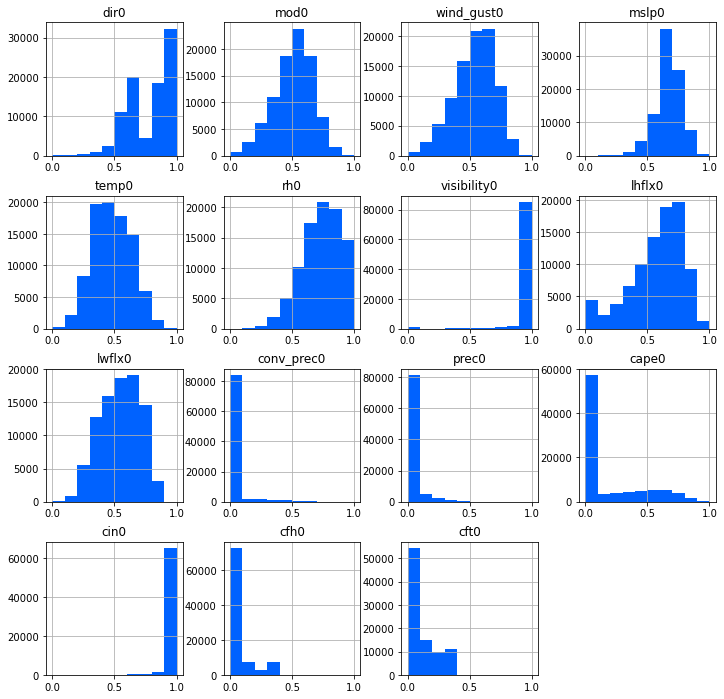

In [25]:
data_del_log_MMS.hist(color=colors[0], figsize=(12, 12))

In [26]:
data_del_log_SS = data_del_log

In [27]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
for col in data_del_log_SS.columns:
    data_del_log_SS[col] = MMS.fit_transform(data_del_log_SS[[col]]).squeeze()

In [28]:
data_del_log_SS.head()

dir0      mod0  wind_gust0     mslp0     temp0       rh0  visibility0  \
0  0.869207  0.738046    0.730572  0.518395  0.426986  0.836097     0.693883   
1  0.863040  0.811286    0.782106  0.486192  0.450954  0.751661     0.976302   
2  0.877052  0.850025    0.890938  0.481984  0.468600  0.744921     0.998788   
3  0.876823  0.880730    0.911287  0.472035  0.475406  0.763778     0.988649   
4  0.876125  0.874195    0.908264  0.462294  0.485221  0.775430     0.998813   

     lhflx0    lwflx0  conv_prec0     prec0  cape0      cin0      cfh0  \
0  0.731723  0.727538    0.019619  0.334744    0.0  0.994766  0.313969   
1  0.803992  0.722929    0.029137  0.414467    0.0  0.994416  0.313969   
2  0.816969  0.730732    0.160276  0.158324    0.0  0.995263  0.313969   
3  0.817208  0.737685    0.069774  0.145840    0.0  0.994824  0.313969   
4  0.789992  0.740261    0.056607  0.100573    0.0  0.995029  0.313969   

       cft0  
0  0.313969  
1  0.313969  
2  0.314803  
3  0.314727  
4  0.314191

array([[<AxesSubplot:title={'center':'dir0'}>,
        <AxesSubplot:title={'center':'mod0'}>,
        <AxesSubplot:title={'center':'wind_gust0'}>,
        <AxesSubplot:title={'center':'mslp0'}>],
       [<AxesSubplot:title={'center':'temp0'}>,
        <AxesSubplot:title={'center':'rh0'}>,
        <AxesSubplot:title={'center':'visibility0'}>,
        <AxesSubplot:title={'center':'lhflx0'}>],
       [<AxesSubplot:title={'center':'lwflx0'}>,
        <AxesSubplot:title={'center':'conv_prec0'}>,
        <AxesSubplot:title={'center':'prec0'}>,
        <AxesSubplot:title={'center':'cape0'}>],
       [<AxesSubplot:title={'center':'cin0'}>,
        <AxesSubplot:title={'center':'cfh0'}>,
        <AxesSubplot:title={'center':'cft0'}>, <AxesSubplot:>]],
      dtype=object)

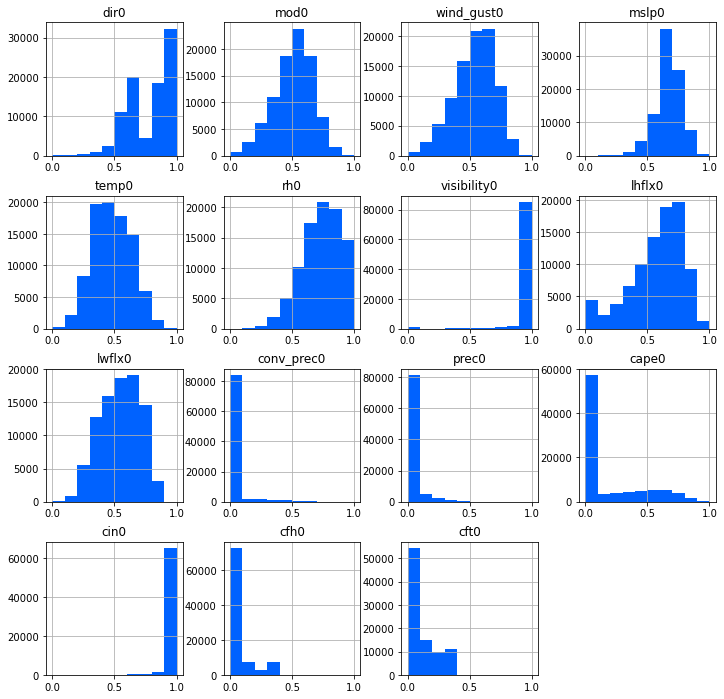

In [29]:
data_del_log_SS.hist(color=colors[0], figsize=(12, 12))

Fit a K-means clustering model to determine optimal clusters.
K-Means models with cluster values ranging from 1 to 20.


Both MinMaxScaler and Standard Scaler produced good results in terms of scaling the data down to a size that does not skew one parameter versus another

In [30]:
float_columns = [x for x in data_del_log_MMS.columns]

In [31]:
float_columns

['dir0',
 'mod0',
 'wind_gust0',
 'mslp0',
 'temp0',
 'rh0',
 'visibility0',
 'lhflx0',
 'lwflx0',
 'conv_prec0',
 'prec0',
 'cape0',
 'cin0',
 'cfh0',
 'cft0']

In [32]:
data_del_log_MMS[float_columns]

dir0      mod0  wind_gust0     mslp0     temp0       rh0  \
0      0.869207  0.738046    0.730572  0.518395  0.426986  0.836097   
1      0.863040  0.811286    0.782106  0.486192  0.450954  0.751661   
2      0.877052  0.850025    0.890938  0.481984  0.468600  0.744921   
3      0.876823  0.880730    0.911287  0.472035  0.475406  0.763778   
4      0.876125  0.874195    0.908264  0.462294  0.485221  0.775430   
...         ...       ...         ...       ...       ...       ...   
90427  0.899460  0.493926    0.548361  0.688854  0.519841  0.939961   
90428  0.886810  0.405201    0.483917  0.688856  0.497887  0.970865   
90429  0.882076  0.417456    0.481844  0.690491  0.486007  0.990776   
90430  0.921303  0.417180    0.397207  0.693230  0.477600  0.993861   
90431  0.933551  0.423195    0.370470  0.694923  0.465633  0.993670   

       visibility0    lhflx0    lwflx0  conv_prec0     prec0     cape0  \
0         0.693883  0.731723  0.727538    0.019619  0.334744  0.000000   
1         0.976302  0.803992  0.722929    0.029137  0.414467  0.000000   
2         0.998788  0.816969  0.730732    0.160276  0.158324  0.000000   
3         0.988649  0.817208  0.737685    0.069774  0.145840  0.000000   
4         0.998813  0.789992  0.740261    0.056607  0.100573  0.000000   
...            ...       ...       ...         ...       ...       ...   
90427     0.998838  0.393143  0.675653    0.019619  0.014133  0.124074   
90428     0.998816  0.369281  0.568097    0.019619  0.035904  0.101934   
90429     0.998786  0.389247  0.770608    0.019619  0.014133  0.234494   
90430     0.316120  0.415034  0.770046    0.019619  0.035903  0.252691   
90431     0.317603  0.457901  0.766760    0.019619  0.035903  0.220416   

           cin0      cfh0      cft0  
0      0.994766  0.313969  0.313969  
1      0.994416  0.313969  0.313969  
2      0.995263  0.313969  0.314803  
3      0.994824  0.313969  0.314727  
4      0.995029  0.313969  0.314191  
...         ...       ...       ...  
90427  0.994148  0.151761  0.151761  
90428  0.994952  0.148510  0.148510  
90429  0.994942  0.152704  0.184114  
90430  0.994890  0.157638  0.230385  
90431  0.994903  0.160829  0.225542  

[90432 rows x 15 columns]

In [33]:
count = np.isinf(data_del_log_MMS).values.sum() # count for any erroneous data
count

0

In [34]:
data_del_log_MMS.isnull().values.any()

True

In [35]:
data_del_log_MMS['cin0'].isnull().values.any()

True

Dropping NULL values in dataframe

In [36]:
data_del_log_MMS = data_del_log_MMS.dropna()

In [37]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
kmeans = KMeans(n_clusters=3).fit(data_del_log_MMS[float_columns])


KMEANS ALGORITHM FOR UNSUPERVISED LEARNING

In [39]:
### BEGIN SOLUTION
# Create and fit a range of models
from sklearn.cluster import KMeans
km_list = list()

for clust in range(1,10):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data_del_log_MMS)
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

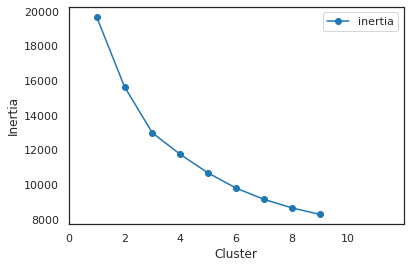

In [40]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,12,2))
ax.set_xlim(0,12)
ax.set(xlabel='Cluster', ylabel='Inertia');
### END SOLUTION

Conclusion: it appears that the inertia stabilizes after 9 clusters. One can assume these clusters correspond to weather 
patterns and we could gather these clusters, present to meterological experts and determine the weather for future data.

Fit an Hierarchical Clustering model:

In [38]:
data_del_log_MMS2=data_del_log_MMS.drop(data_del_log_MMS.index[10000:])

PROBLEM: dropped some data - The IBM Cloud Kernal Failed over 3X - reduced data to 10,000 rows

In [39]:
data_del_log_MMS2.head()

dir0      mod0  wind_gust0     mslp0     temp0       rh0  visibility0  \
0  0.869207  0.738046    0.730572  0.518395  0.426986  0.836097     0.693883   
1  0.863040  0.811286    0.782106  0.486192  0.450954  0.751661     0.976302   
2  0.877052  0.850025    0.890938  0.481984  0.468600  0.744921     0.998788   
3  0.876823  0.880730    0.911287  0.472035  0.475406  0.763778     0.988649   
4  0.876125  0.874195    0.908264  0.462294  0.485221  0.775430     0.998813   

     lhflx0    lwflx0  conv_prec0     prec0  cape0      cin0      cfh0  \
0  0.731723  0.727538    0.019619  0.334744    0.0  0.994766  0.313969   
1  0.803992  0.722929    0.029137  0.414467    0.0  0.994416  0.313969   
2  0.816969  0.730732    0.160276  0.158324    0.0  0.995263  0.313969   
3  0.817208  0.737685    0.069774  0.145840    0.0  0.994824  0.313969   
4  0.789992  0.740261    0.056607  0.100573    0.0  0.995029  0.313969   

       cft0  
0  0.313969  
1  0.313969  
2  0.314803  
3  0.314727  
4  0.314191

In [40]:
data_del_log_MMS2.shape

(10000, 15)

2nd Algorithm - Agglomerative Clustering

In [41]:
X = data_del_log_MMS2

In [42]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, ..., 0, 1, 1])

In [43]:
print(cluster.labels_)

[0 0 0 ... 0 1 1]


In [44]:
cluster.fit(X)
labels = cluster.labels_

In [53]:
labels[0:300]

array([0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1])

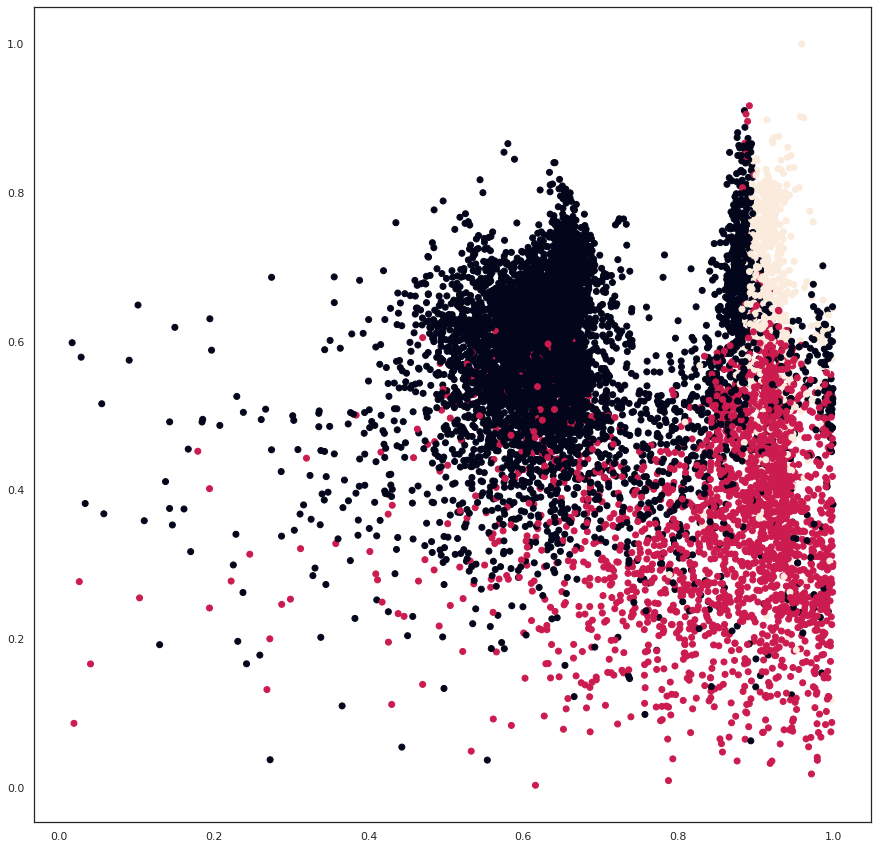

In [54]:
plt.figure(figsize=(15,15))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=labels)
plt.show()

The optimal amount of clusters for this data set is 3. There are clearly 3 distinct regions shown in the above graph. If you compare to Kmeans algorithm
the elbow on the inertia graph begins at 3 but seems to flatten after 10. However, it is difficult to see how the data is clustered on Kmeans but for
Agglomerative Clustering there are 3 clear regions.  When the # of clusters is 4 or more, the clusters blur together.

In [45]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [46]:
# generate the linkage matrix
Z = linkage(X, 'ward')


Hierarchical Clustering Dendrogram which will show distances as # of clusters increase.

In [57]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.5079123408436517

common linkage methods like 'single', 'complete', 'average', ... ... 

In [58]:

Z1 = linkage(X, 'average')
c, coph_dists = cophenet(Z1, pdist(X))
c

0.7178147004071651

In [59]:

Z2 = linkage(X, 'single')
c, coph_dists = cophenet(Z2, pdist(X))
c

0.5835259911046818

In [60]:
Z1[0]

array([5.72800000e+03, 5.72900000e+03, 4.82989333e-03, 2.00000000e+00])

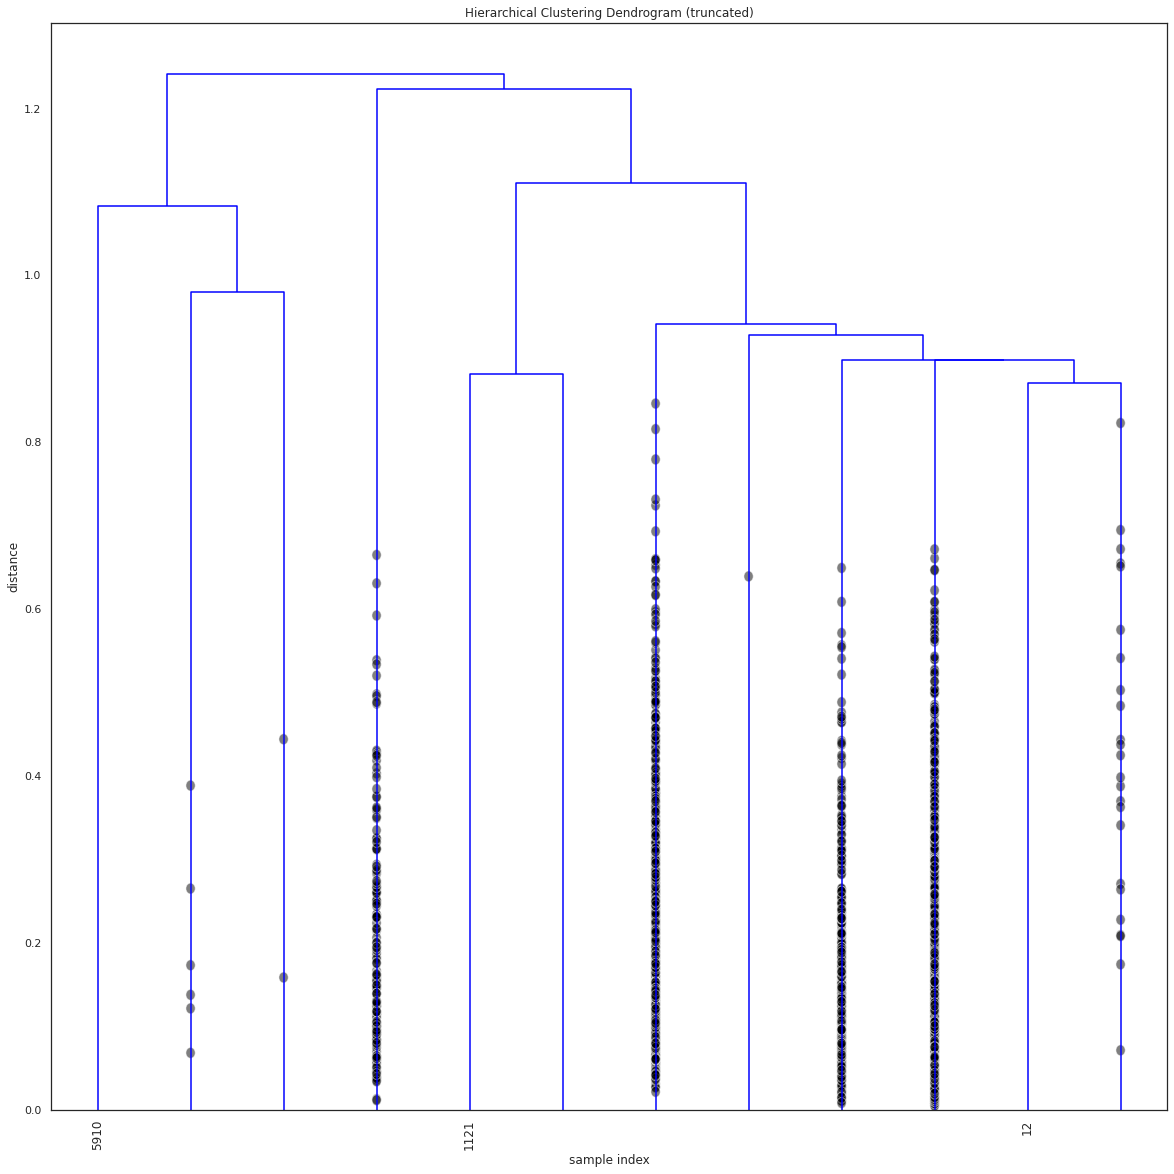

In [63]:
plt.figure(figsize=(20,20))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
 
plt.show()

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 5 clusters as shown in the following figure.
For optimal prediciton of weather patterns, the optimal number of clusters is 3-4. In this case I would pick 3.  Now, I need to analyze the
other set of data that I dropped and combine them.



PCA Dimensionalty

In [47]:
data = X

In [48]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

model       var
n                               
1  PCA(n_components=1)  0.344245
2  PCA(n_components=2)  0.527569
3  PCA(n_components=3)  0.659764
4  PCA(n_components=4)  0.756688
5  PCA(n_components=5)  0.825493

In [49]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features     cape0      cfh0      cft0      cin0  conv_prec0      dir0  \
n                                                                        
1         0.027964  0.030842  0.050251  0.002728    0.002945  0.077428   
2         0.082400  0.063840  0.090067  0.010414    0.018533  0.066947   
3         0.059777  0.070438  0.091889  0.007785    0.014074  0.080561   
4         0.083412  0.096214  0.107023  0.011030    0.016797  0.078068   
5         0.097620  0.082897  0.094753  0.013358    0.019965  0.100039   

features    lhflx0    lwflx0      mod0     mslp0     prec0       rh0  \
n                                                                      
1         0.214551  0.141873  0.096531  0.005539  0.007860  0.108240   
2         0.128375  0.099483  0.099576  0.029496  0.023996  0.091273   
3         0.105494  0.100465  0.113953  0.021011  0.017380  0.065236   
4         0.086301  0.094762  0.088281  0.017005  0.016910  0.084610   
5         0.072649  0.080324  0.074772  0.017081  0.014888  0.117014   

features     temp0  visibility0  wind_gust0  
n                                            
1         0.105442     0.035942    0.091865  
2         0.073978     0.026066    0.095555  
3         0.111444     0.020222    0.120270  
4         0.103323     0.023896    0.092368  
5         0.105634     0.031339    0.077667

In [56]:
feature_weight_list[2]

n     features    values
0   3         dir0  0.080561
1   3         mod0  0.113953
2   3   wind_gust0  0.120270
3   3        mslp0  0.021011
4   3        temp0  0.111444
5   3          rh0  0.065236
6   3  visibility0  0.020222
7   3       lhflx0  0.105494
8   3       lwflx0  0.100465
9   3   conv_prec0  0.014074
10  3        prec0  0.017380
11  3        cape0  0.059777
12  3         cin0  0.007785
13  3         cfh0  0.070438
14  3         cft0  0.091889

WInd gust, wind intensity, and temperature, are the heaviest weighted factors.

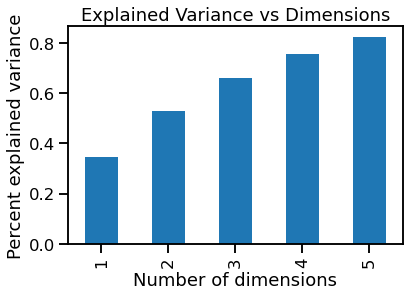

In [52]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

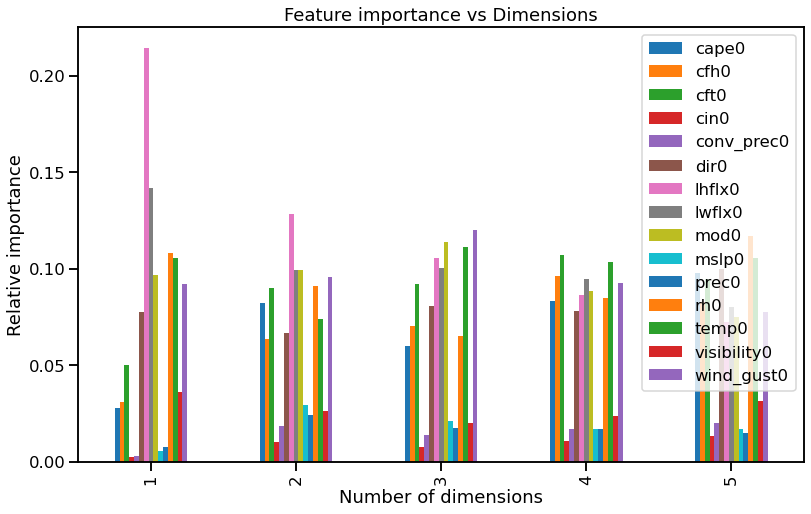

In [53]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');